# Intro

In [1]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-04-09 12:02:39.824780: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-09 12:02:39.825777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
import spacy

%load_ext nb_black

nlp = spacy.load("en_core_web_sm")

<IPython.core.display.Javascript object>

In [2]:
# Process sentences 'Hello, world. Antonio is learning Python.' using spaCy
doc = nlp(u"Hello, world. Antonio is learning Python.")

<IPython.core.display.Javascript object>

## Get tokens and sentences

#### What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Antonio is learning Python!"
	["Antonio","is","learning","Python!"]

In [3]:
# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

Hello
Hello, world.
Antonio is learning Python.


<IPython.core.display.Javascript object>

## Part of speech tags

#### What is a Speech Tag?
A speech tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in NLP can be [found here](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Jan", "Javier", "Antonio", "Italy"
3. INTJ, Interjection - "Ohhhhhhhhhhh"

In [5]:
# For each token, print corresponding part of speech tag
for token in doc:
    print(token, token.pos_)

Hello INTJ
, PUNCT
world NOUN
. PUNCT
Antonio PROPN
is AUX
learning VERB
Python PROPN
. PUNCT


<IPython.core.display.Javascript object>

In [6]:
from spacy import displacy

<IPython.core.display.Javascript object>

In [7]:
displacy.serve(doc, style='dep')



C:\Users\kovac\anaconda3\envs\NLP\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


<IPython.core.display.Javascript object>

In [8]:
displacy.render(doc, style = "ent",jupyter = True)


<IPython.core.display.Javascript object>

We have said that dependency structures are represented by directed graphs that satisfy the following constraints:

1. There is a single designated root node that has no incoming arcs.

2. With the exception of the root node, each vertex has exactly one incoming arc.

3. There is a unique path from the root node to each vertex in V.

You can inspect the head of each token by invoking the `.head` attribute of a spaCy token:


In [14]:
doc[2]

world

<IPython.core.display.Javascript object>

In [17]:
doc[2].head

Hello

<IPython.core.display.Javascript object>

So how would you search for the root?

Since there is a unique path from the root node to each vertex in V, there's only one root node that has no incoming arcs, we can search for the token which have as head itself!

In [18]:
for token in doc:
    if token.head == token:
        print(token)

Hello
learning


<IPython.core.display.Javascript object>

As expected, since there were two sentences in the doc, we got two roots.

We can also build a function that, given a spaCy token, gives the path till the root:

In [23]:
def path_to_the_root(token):
    if token.head == token:
        return
    else:
        print(f"{token}->{token.head}")
        path_to_the_root(token.head)

<IPython.core.display.Javascript object>

In [24]:
path_to_word_origin(doc)

Hello  ====>  hello
,  ====>  ,
world  ====>  world
.  ====>  .
Antonio  ====>  Antonio
is  ====>  be
learning  ====>  learn
Python  ====>  Python
.  ====>  .


<IPython.core.display.Javascript object>

In [25]:
path_to_the_root(doc[4])

Antonio->learning


<IPython.core.display.Javascript object>

In [96]:
# Define a function to find the path to the root of each word in a sentence


def path_to_the_root(token):
    if token.head == token:
        return
    else:
        print(f"{token}->{token.head}")
        path_to_the_root(token.head)

<IPython.core.display.Javascript object>

In [107]:
path_to_the_root(doc[4])

Antonio->learning


<IPython.core.display.Javascript object>

# Pride and Prejudice analysis

We would like to:

- Extract the names of all the characters from the book (e.g. Elizabeth, Darcy, Bingley)
- Visualize characters' occurences with regards to relative position in the book
- Authomatically describe any character from the book
- Find out which characters have been mentioned in a context of marriage
- Build keywords extraction that could be used to display a word cloud (example)

To load the text file, it is convinient to decode using the utf-8 standard:

In [26]:
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as file:
        return file.read()

<IPython.core.display.Javascript object>

### Process full text

In [27]:
text = read_file("data/pride_and_prejudice.txt")
# Process the text
processed_text = nlp(text)

<IPython.core.display.Javascript object>

In [28]:
processed_text

The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last updated: February 15, 2015]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or

<IPython.core.display.Javascript object>

In [29]:
# How many sentences are in the book (Pride & Prejudice)?

sentences = [s for s in processed_text.sents]
print(len(sentences))
print(len(list(processed_text.sents)))
# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:20])

6814
6814
[It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife., 

, However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or other of their daughters., 

"My dear Mr. Bennet," said his lady to him one day, "have you heard that
Netherfield Park is let at last?", 

Mr. Bennet replied that he had not., 

", But it is," returned she; "for Mrs. Long has just been here, and she
told me all about it.", 

Mr. Bennet made no answer., 

"Do you not want to know who has taken it?" cried his wife impatiently., 

"_You_ want to tell me, and I have no objection to hearing it."]


<IPython.core.display.Javascript object>

In [30]:
print("Actual number of sentences: {}".format(len(list(processed_text.sents))))

Actual number of sentences: 6814


<IPython.core.display.Javascript object>

In [31]:
print(list(processed_text.sents)[10:15])

[It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife., 

, However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or other of their daughters., 

"My dear Mr. Bennet," said his lady to him one day, "have you heard that
Netherfield Park is let at last?", 

Mr. Bennet replied that he had not.]


<IPython.core.display.Javascript object>

## Find all the personal names

[Hint](# "List doc.ents and check ent.label_")

In [32]:
# Extract all the personal names from Pride & Prejudice and count their occurrences.
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict


def find_character_occurences(doc, n=10):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters[ent.lemma_] += 1
    return characters.most_common(n)


print(find_character_occurences(processed_text)[:20])

[('Elizabeth', 617), ('Darcy', 391), ('Jane', 267), ('Bennet', 229), ('Wickham', 176), ('Collins', 168), ('Bingley', 133), ('Lizzy', 94), ('Lady Catherine', 88), ('Gardiner', 87)]


<IPython.core.display.Javascript object>

In [33]:
def find_character_occurences2(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """

    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters[ent.lemma_] += 1

    return characters.most_common()


print(find_character_occurences2(processed_text)[:20])

[('Elizabeth', 617), ('Darcy', 391), ('Jane', 267), ('Bennet', 229), ('Wickham', 176), ('Collins', 168), ('Bingley', 133), ('Lizzy', 94), ('Lady Catherine', 88), ('Gardiner', 87), ('Miss Bingley', 53), ('Meryton', 48), ('Fitzwilliam', 34), ('William', 31), ('Hurst', 29), ('Miss Bennet', 29), ('Phillips', 22), ('Project Gutenberg - tm', 22), ('Brighton', 21), ('Forster', 20)]


<IPython.core.display.Javascript object>

In [35]:
for ent in processed_text.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Pride and Prejudice 31 50 ORG
Jane Austen 55 66 PERSON
eBook 73 78 PRODUCT
eBook 280 285 ORG
Prejudice 336 345 PERSON
Jane Austen 355 366 PERSON
August 26, 2008 382 397 DATE
June, 1998 426 436 DATE
February 15, 2015 451 468 DATE
English 481 488 LANGUAGE
Anonymous Volunteers





PRIDE AND 573 608 PERSON
Jane Austen 623 634 PERSON
Chapter 1 638 647 LAW
first 840 845 ORDINAL
Bennet 1041 1047 PERSON
one day 1071 1078 DATE
Bennet 1140 1146 PERSON
Long 1210 1214 PERSON
Bennet 1271 1277 PERSON
Long 1497 1501 PERSON
Netherfield 1512 1523 ORG
England 1583 1590 GPE
Monday 1613 1619 DATE
four 1636 1640 CARDINAL
Morris 1718 1724 PERSON
Michaelmas 1775 1785 PERSON
the end of next week 1838 1858 DATE
four 1988 1992 CARDINAL
five thousand a year 1996 2016 DATE
Bennet 2101 2107 PERSON
one 2206 2209 CARDINAL
one 2355 2358 CARDINAL
Bingley 2598 2605 PERSON
five 2785 2789 CARDINAL
Bingley 2974 2981 PERSON
one 3148 3151 CARDINAL
William 3165 3172 PERSON
Lady Lucas 3177 3187 PERSON
Bingley 3419 3426 PERSO

one 51489 51492 CARDINAL
Elizabeth 51521 51530 PERSON
Jane 51868 51872 PERSON
three miles 51976 51987 QUANTITY
Hurst 52078 52083 PERSON
Miss Bingley 52088 52100 PERSON
Elizabeth 52106 52115 PERSON
Darcy 52334 52339 PERSON
Elizabeth 52773 52782 PERSON
Jane 52828 52832 PERSON
Miss Bingley 53062 53074 PERSON
Elizabeth 53202 53211 PERSON
Elizabeth
 53297 53307 ORG
Jane 53398 53402 PERSON
Elizabeth 53736 53745 PERSON
three 53914 53919 CARDINAL
Elizabeth 53921 53930 PERSON
Bingley 53989 53996 PERSON
Jane 54080 54084 PERSON
Miss Bingley 54134 54146 PERSON
Netherfield 54224 54235 ORG
Elizabeth 54253 54262 PERSON
Chapter 8 54408 54417 LAW
five o'clock 54423 54435 TIME
two 54440 54443 CARDINAL
half-past six 54476 54489 DATE
Elizabeth 54490 54499 PERSON
Bingley 54662 54669 PERSON
Jane 54718 54722 PERSON
three 54786 54791 CARDINAL
four 54795 54799 CARDINAL
Jane 55001 55005 PERSON
Elizabeth 55048 55057 PERSON
Jane 55216 55220 PERSON
Miss Bingley 55433 55445 PERSON
Darcy 55467 55472 PERSON
Elizabeth

Darcy 96465 96470 PERSON
Elizabeth 96567 96576 PERSON
Chapter 12 96600 96610 LAW
Elizabeth 96665 96674 PERSON
the day 96780 96787 DATE
Bennet 96798 96804 PERSON
Netherfield 96855 96866 ORG
Tuesday 96886 96893 DATE
Jane 96922 96926 PERSON
Elizabeth 97056 97065 PERSON
Tuesday 97192 97199 DATE
Bingley 97249 97256 PERSON
Elizabeth 97366 97375 PERSON
Jane 97545 97549 PERSON
Bingley 97564 97571 PERSON
Netherfield 97663 97674 PERSON
that morning 97675 97687 TIME
Jane 97874 97878 PERSON
Bingley 97931 97938 PERSON
one 98019 98022 CARDINAL
Jane 98270 98274 PERSON
Darcy 98328 98333 PERSON
Elizabeth 98363 98372 PERSON
Netherfield 98385 98396 PERSON
the last day 98770 98782 DATE
ten 98880 98883 CARDINAL
Saturday 98918 98926 DATE
half-an-hour 98984 98996 TIME
Sunday 99079 99085 DATE
morning 99093 99100 TIME
Bingley 99171 99178 PERSON
Elizabeth 99193 99202 PERSON
Jane 99264 99268 PERSON
Netherfield 99393 99404 PERSON
Elizabeth 99477 99486 PERSON
Bennet 99612 99618 PERSON
Jane 99711 99715 PERSON
eveni

Darcy 153566 153571 PERSON
Wickham 153600 153607 PERSON
first 153630 153635 ORDINAL
Darcy 153917 153922 PERSON
Wickham 153938 153945 PERSON
Bingley 154111 154118 PERSON
Elizabeth 154162 154171 PERSON
Charlotte Lucas 154345 154360 PERSON
a week 154388 154394 DATE
first 154527 154532 ORDINAL
two 154533 154536 CARDINAL
Collins 154623 154630 PERSON
Wickham 154952 154959 PERSON
Charlotte Lucas 155052 155067 PERSON
Darcy 155152 155157 PERSON
Charlotte 155376 155385 GPE
Darcy 155651 155656 PERSON
Charlotte 155687 155696 GPE
Wickham 155788 155795 PERSON
ten 155847 155850 CARDINAL
Elizabeth 155874 155883 PERSON
Darcy 156020 156025 PERSON
two 156222 156225 CARDINAL
first 156241 156246 ORDINAL
some minutes 156476 156488 TIME
second 156510 156516 ORDINAL
Darcy 156574 156579 PERSON
half an hour 157095 157107 TIME
Elizabeth 157387 157396 PERSON
Meryton 158058 158065 PERSON
the other day 158168 158181 DATE
Elizabeth 158337 158346 PERSON
Darcy 158420 158425 PERSON
Wickham 158472 158479 PERSON
Elizabet

Elizabeth 226260 226269 PERSON
Charlotte 226370 226379 GPE
daily 226541 226546 DATE
Bingley 226564 226571 ORG
a week 226590 226596 DATE
Jane 226640 226644 PERSON
Caroline 226654 226662 PERSON
the days 226711 226719 DATE
Collins 226805 226812 PERSON
Tuesday 226824 226831 DATE
Miss Lucas 227158 227168 PERSON
Monday 227377 227383 DATE
Lady Catherine 227399 227413 PERSON
Charlotte 227582 227591 GPE
early day 227603 227612 DATE
Collins 227654 227661 PERSON
Hertfordshire 227676 227689 GPE
Bennet 227733 227739 PERSON
Lucas Lodge 227884 227895 PERSON
Bennet 228122 228128 PERSON
Bingley 228184 228191 PERSON
Neither Jane 228214 228226 PERSON
Elizabeth 228231 228240 PERSON
Meryton 228386 228393 PERSON
Elizabeth 228572 228581 PERSON
Bingley 228606 228613 GPE
Jane 228749 228753 PERSON
two 228892 228895 CARDINAL
London 229010 229016 GPE
Jane 229092 229096 PERSON
Elizabeth 229166 229175 PERSON
Elizabeth 229257 229266 PERSON
Bingley 229411 229418 GPE
Jane 229476 229480 PERSON
Jane 229574 229578 PERSON

Collins 279326 279333 PERSON
two 279352 279355 CARDINAL
Charlotte 279426 279435 PERSON
Rosings 279509 279516 WORK_OF_ART
the next day 279517 279529 DATE
Chapter 29 279534 279544 LAW
Collins 279551 279558 PERSON
Catherine 279893 279902 PERSON
Sunday 280057 280063 DATE
William 280469 280476 PERSON
next morning 280719 280731 TIME
Rosings 280751 280758 ORG
Collins 280764 280771 PERSON
Lady Catherine 281312 281326 PERSON
two or three 281474 281486 CARDINAL
Lady Catherine 281554 281568 PERSON
Maria Lucas
 281708 281720 PERSON
Rosings 281803 281810 WORK_OF_ART
St. James's 281883 281894 FAC
about half 281950 281960 CARDINAL
Elizabeth 282034 282043 PERSON
Collins 282121 282128 PERSON
Lewis de Bourgh 282319 282334 PERSON
Maria 282379 282384 PERSON
William 282435 282442 PERSON
Elizabeth 282472 282481 PERSON
Lady
Catherine 282535 282549 PERSON
Collins 282755 282762 PERSON
Jenkinson 282955 282964 PERSON
Collins 283054 283061 PERSON
St. James's 283288 283299 FAC
William 283305 283312 PERSON
Elizabet

Elizabeth 330208 330217 PERSON
first 331016 331021 ORDINAL
Darcy 332430 332435 PERSON
Elizabeth 332818 332827 PERSON
Darcy 333733 333738 PERSON
Elizabeth 334774 334783 PERSON
many months ago 335120 335135 DATE
Wickham 335145 335152 PERSON
Darcy 335394 335399 PERSON
Darcy 335572 335577 PERSON
Elizabeth 335674 335683 PERSON
the best years 335875 335889 DATE
Darcy 336090 336095 PERSON
Elizabeth 337088 337097 PERSON
Darcy 337235 337240 PERSON
first 337791 337796 ORDINAL
Elizabeth 338532 338541 PERSON
Darcy 338903 338908 PERSON
Wickham 339497 339504 PERSON
Lady Catherine 339713 339727 PERSON
Charlotte 339786 339795 ORG
Chapter 35 339848 339858 LAW
Elizabeth 339861 339870 PERSON
the next morning 339877 339893 TIME
Darcy 340275 340280 PERSON
one 340491 340494 CARDINAL
two 340540 340543 CARDINAL
three 340547 340552 CARDINAL
The five weeks 340686 340700 DATE
Darcy 341275 341280 PERSON
Elizabeth 341731 341740 PERSON
two 341830 341833 CARDINAL
Rosings 342012 342019 ORG
eight o'clock in the mornin

five-and-twenty years 401111 401132 DATE
two days 401175 401183 DATE
Miller 401206 401212 ORG
Lydia 401317 401322 ORG
Brighton 401349 401357 PERSON
Bennet 401374 401380 PERSON
Brighton 401417 401425 PERSON
Phillips 401520 401528 ORG
Kitty 401583 401588 ORG
Elizabeth 401674 401683 PERSON
Darcy 401792 401797 PERSON
Lydia 401925 401930 ORG
Forster 402009 402016 PERSON
Brighton 402079 402087 PERSON
Lydia 402231 402236 ORG
two 402322 402325 CARDINAL
Lydia 402344 402349 ORG
Forster 402390 402397 PERSON
Bennet 402419 402425 PERSON
Kitty 402452 402457 ORG
Lydia 402534 402539 ORG
Kitty 402697 402702 ORG
Forster 402824 402831 PERSON
Lydia 402863 402868 ORG
two years 402996 403005 DATE
Elizabeth 403027 403036 PERSON
Jane 403073 403077 PERSON
Elizabeth 403107 403116 PERSON
Lydia 403213 403218 ORG
Lydia 403489 403494 ORG
Forster 403598 403605 PERSON
Brighton 403684 403692 GPE
Lydia 403789 403794 ORG
Elizabeth 404030 404039 PERSON
Lydia 404126 404131 ORG
Bennet 404291 404297 PERSON
Lizzy 404363 4043

Georgiana 471910 471919 ORG
Elizabeth 472066 472075 PERSON
Georgiana
 472088 472098 ORG
Bingley 472206 472213 PERSON
Eliza Bennet 472319 472331 PERSON
this morning 472338 472350 TIME
Darcy 472356 472361 PERSON
the winter 472438 472448 DATE
Louisa 472484 472490 PERSON
Darcy 472573 472578 PERSON
the
summer 472766 472776 DATE
Miss Bingley 473371 473383 PERSON
Darcy 473393 473398 PERSON
Elizabeth 473407 473416 PERSON
first 473716 473721 ORDINAL
Hertfordshire 473734 473747 GPE
one night 473852 473861 TIME
Netherfield 473893 473904 ORG
Darcy 474084 474089 PERSON
first 474156 474161 ORDINAL
many months 474181 474192 DATE
Miss Bingley 474297 474309 PERSON
Gardiner 474416 474424 PERSON
Elizabeth 474429 474438 PERSON
Elizabeth 474780 474789 PERSON
Gardiner 474820 474828 PERSON
Gardiner 474854 474862 PERSON
Chapter 46 474937 474947 LAW
Elizabeth 474950 474959 PERSON
Jane 475023 475027 PERSON
first 475037 475042 ORDINAL
Lambton 475054 475061 GPE
third 475170 475175 ORDINAL
two 475243 475246 CARDIN

Lydia 535959 535964 ORG
sixteen 536073 536080 CARDINAL
Wickham 536203 536210 PERSON
Lizzy 536310 536315 PERSON
Hill 536446 536450 PERSON
Wickham 536896 536903 PERSON
first 537113 537118 ORDINAL
Wickham 537258 537265 PERSON
last June 537312 537321 DATE
Jane 537331 537335 PERSON
Jane 537687 537691 PERSON
One day's 537792 537801 DATE
Meryton 537972 537979 PERSON
Lady Lucas 538103 538113 PERSON
Long 538123 538127 PERSON
Kitty 538129 538134 ORG
Meryton 538260 538267 PERSON
Hill 538284 538288 PERSON
Hill 538298 538302 PERSON
Lydia 538339 538344 PERSON
Hill 538445 538449 PERSON
Elizabeth 538486 538495 PERSON
Lydia 538643 538648 PERSON
only two hours ago 538926 538944 TIME
Chapter 50 539002 539012 LAW
Bennet 539019 539025 PERSON
annual 539141 539147 DATE
Lydia 539303 539308 ORG
one 539449 539452 CARDINAL
Great Britain 539488 539501 GPE
first 539838 539843 ORDINAL
Bennet 539848 539854 PERSON
Five 540102 540106 CARDINAL
many years 540199 540209 DATE
Lydia 540216 540221 ORG
Bennet 540349 540355 P

Elizabeth 606887 606896 PERSON
Kitty 607018 607023 PERSON
Elizabeth 607080 607089 PERSON
Kitty 607180 607185 ORG
Bennet 607248 607254 PERSON
this day 607269 607277 DATE
evening 607457 607464 TIME
this day 607862 607870 DATE
Jane 607872 607876 PERSON
Bingley 607960 607967 ORG
Elizabeth 607973 607982 PERSON
Darcy 608063 608068 PERSON
Bingley 608223 608230 ORG
Bennet 608279 608285 PERSON
Bingley 608446 608453 GPE
evening 608659 608666 TIME
Bennet 608672 608678 PERSON
Elizabeth 608759 608768 PERSON
Bingley 609201 609208 ORG
Elizabeth 609539 609548 PERSON
Bingley 609592 609599 ORG
Jane 609719 609723 PERSON
Elizabeth 609752 609761 PERSON
Elizabeth 610026 610035 PERSON
Jane 610204 610208 PERSON
half 610274 610278 CARDINAL
Lizzy 610523 610528 PERSON
Kitty 610763 610768 ORG
Elizabeth 610771 610780 PERSON
a few minutes 611129 611142 TIME
Bingley 611161 611168 ORG
Elizabeth 611472 611481 PERSON
Jane 611710 611714 PERSON
Elizabeth 611765 611774 PERSON
Jane 611941 611945 PERSON
Miss Bennet's 612091

Kitty 679565 679570 PERSON
two 679641 679644 CARDINAL
Lydia 679786 679791 ORG
Lydia 679828 679833 ORG
Lydia 679975 679980 ORG
Wickham 680041 680048 PERSON
Bennet 680309 680315 PERSON
Wickham 680639 680646 PERSON
Lydia 680651 680656 ORG
Elizabeth 680776 680785 PERSON
Darcy 680954 680959 PERSON
Elizabeth 681039 681048 PERSON
Lydia 681063 681068 ORG
Darcy 681259 681264 PERSON
Wickham 681447 681454 PERSON
about three or four hundred 681601 681628 CARDINAL
Darcy 681670 681675 PERSON
Elizabeth 681745 681754 PERSON
two 682116 682119 CARDINAL
Jane 682280 682284 PERSON
Darcy 682825 682830 PERSON
Pemberley 682860 682869 ORG
Elizabeth 682880 682889 PERSON
Lydia 682941 682946 ORG
London 683027 683033 GPE
Bath 683037 683041 PERSON
Bingley 683119 683126 ORG
Miss Bingley 683225 683237 PERSON
Darcy 683267 683272 PERSON
Pemberley 683352 683361 LOC
Georgiana 683417 683426 GPE
Darcy 683451 683456 PERSON
Elizabeth 683513 683522 PERSON
Georgiana 683543 683552 ORG
Darcy 683612 683617 PERSON
Georgiana 683701

<IPython.core.display.Javascript object>

## Plot characters personal names as a time series 

In [36]:
# Matplotlib Jupyter HACK
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

We can investigate where a particular entity occurs in the text. We can do it just accessing the `.start` attribute of an entity:

[Hint](# "ent.start")

In [37]:
# List all the start positions of person entities
for ent in processed_text.ents:
    if ent.label_ == "PERSON":
        print(ent.start)

10
70
74
128
136
228
255
275
293
355
406
417
515
647
746
793
795
859
908
922
944
997
1012
1181
1285
1296
1371
1376
1393
1422
1438
1452
1496
1519
1550
1622
1649
1701
1713
1787
1835
1969
2102
2172
2186
2310
2370
2393
2425
2475
2485
2554
2580
2610
2613
2709
2733
2762
2819
2855
2933
2953
2996
3008
3079
3167
3232
3239
3243
3317
3342
3370
3413
3531
3601
3673
3751
3757
3762
3833
3850
3870
3872
3883
3896
3957
4038
4070
4091
4188
4225
4234
4242
4251
4376
4416
4432
4533
4535
4552
4622
5005
5039
5249
5284
5383
5400
5430
5503
5524
5566
5589
5603
5656
5672
5730
5743
5805
5848
5884
5898
5994
6078
6099
6126
6185
6202
6228
6278
6293
6305
6313
6360
6440
6474
6510
6551
6559
6578
6606
6612
6668
6700
6731
6735
6755
6807
6891
6921
7063
7201
7212
7214
7257
7270
7298
7350
7403
7455
7692
7746
7788
7844
7890
7940
8050
8084
8089
8261
8268
8293
8524
8541
8559
8570
8648
8664
8685
8710
8758
8771
8853
8883
9005
9049
9073
9135
9172
9181
9198
9258
9300
9310
9403
9445
9470
9503
9513
9567
9596
9636
9657
9664
9687
9739


82684
82687
82706
82801
82806
82973
83135
83151
83182
83202
83233
83300
83349
83353
83449
83519
83548
83574
83583
83643
83675
83728
83747
83926
83933
84043
84050
84056
84091
84176
84199
84228
84306
84516
84522
84556
84625
84644
84654
84675
84741
84767
84884
84914
84934
84941
84967
84970
85007
85016
85150
85199
85299
85403
85455
85462
85512
85533
85576
85744
85753
85801
85813
85896
85924
85999
86039
86054
86059
86086
86132
86152
86290
86313
86582
86602
86618
86656
86686
86711
86742
86794
86796
86902
86920
86923
86946
86954
86961
87008
87051
87264
87323
87393
87409
87427
87449
87478
87512
87547
87550
87653
87671
87685
87703
87708
87720
87743
87759
87764
87778
87795
87882
87911
88113
88134
88145
88194
88268
88293
88344
88349
88401
88424
88446
88526
88590
88655
88665
88702
88755
88832
88860
88880
88895
88898
89096
89197
89254
89305
89308
89381
89387
89428
89490
89509
89528
89640
89677
89716
89858
89977
89982
90000
90038
90087
90182
90207
90227
90521
90545
90645
90739
90744
90756
90819
9084

<IPython.core.display.Javascript object>

In [64]:
for ent in doc.ents:
    if ent.label_ == "PERSON":
        print(ent.start)

10
70
74
128
136
228
255
275
293
355
406
417
515
647
746
793
795
859
908
922
944
997
1012
1181
1285
1296
1371
1376
1393
1422
1438
1452
1496
1519
1550
1622
1649
1701
1713
1787
1835
1969
2102
2172
2186
2310
2370
2393
2425
2475
2485
2554
2580
2610
2613
2709
2733
2762
2819
2855
2933
2953
2996
3008
3079
3167
3232
3239
3243
3317
3342
3370
3413
3531
3601
3673
3751
3757
3762
3833
3850
3870
3872
3883
3896
3957
4038
4070
4091
4188
4225
4234
4242
4251
4376
4416
4432
4533
4535
4552
4622
5005
5039
5249
5284
5383
5400
5430
5503
5524
5566
5589
5603
5656
5672
5730
5743
5805
5848
5884
5898
5994
6078
6099
6126
6185
6202
6228
6278
6293
6305
6313
6360
6440
6474
6510
6551
6559
6578
6606
6612
6668
6700
6731
6735
6755
6807
6891
6921
7063
7201
7212
7214
7257
7270
7298
7350
7403
7455
7692
7746
7788
7844
7890
7940
8050
8084
8089
8261
8268
8293
8524
8541
8559
8570
8648
8664
8685
8710
8758
8771
8853
8883
9005
9049
9073
9135
9172
9181
9198
9258
9300
9310
9403
9445
9470
9503
9513
9567
9596
9636
9657
9664
9687
9739


95410
95428
95648
95730
95871
95996
96071
96206
96427
96464
96560
96570
96585
96639
96656
96673
96676
96698
96702
96804
96807
96815
96824
96841
96851
96913
96934
97000
97016
97077
97080
97131
97340
97351
97369
97401
97452
97610
97715
97742
97756
97759
97849
97922
97954
98004
98028
98060
98257
98382
98456
98700
99018
99088
99297
99445
99470
99541
99606
99626
99660
99836
100044
100046
100131
100187
100199
100210
100366
100380
100397
100488
100573
100580
100600
100728
100843
100973
101009
101024
101183
101195
101209
101219
101247
101345
101373
101402
101512
101528
101584
101641
101760
101787
101812
101818
101941
102076
102190
102207
102235
102277
102287
102341
102360
102383
102438
102517
102561
102630
102712
102717
102822
102833
102894
103008
103090
103373
103391
103394
103410
103433
103463
103566
103688
103715
103754
103836
103979
104041
104048
104530
104612
104636
104678
104683
104807
104817
104819
104883
104902
104904
104946
104987
104994
105003
105037
105047
105063
105180
105186
10527

<IPython.core.display.Javascript object>

So we can create a function that stores all the offsets of every character:
   
   
[Hint](# "Create a dictionary with the lowered lemmas [ent.lemma_.lower()] and associate a list of all the ent.starts")

In [40]:
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.

    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """

    character_offsets = {}
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            if ent.lemma_.lower() not in character_offsets:
                character_offsets[ent.lemma_.lower()] = [ent.start]
            else:
                character_offsets[ent.lemma_.lower()].append(ent.start)
    return dict(character_offsets)


character_occurences = get_character_offsets(processed_text)

<IPython.core.display.Javascript object>

In [41]:
character_occurences

{'jane austen': [10, 74, 136, 155588],
 'prejudice': [70],
 'anonymous volunteers \n\n\n\n\n\n pride and': [128],
 'bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1713,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3317,
  3601,
  3957,
  4038,
  4376,
  5848,
  6099,
  6185,
  6360,
  7201,
  10191,
  10729,
  10863,
  11037,
  11070,
  11274,
  11425,
  11585,
  11748,
  15473,
  15502,
  15623,
  15754,
  16235,
  16294,
  17213,
  17578,
  22708,
  23297,
  23510,
  23629,
  23972,
  24027,
  24640,
  25088,
  25165,
  25506,
  25567,
  25645,
  25720,
  26012,
  26126,
  26466,
  26566,
  26642,
  26942,
  26955,
  26979,
  27046,
  27387,
  27450,
  27601,
  27626,
  27704,
  27779,
  29054,
  29186,
  34154,
  34208,
  34231,
  39525,
  40029,
  40744,
  41185,
  41260,
  41330,
  41423,
  41525,
  41741,
  42045,
  44078,
  44217,
  44435,
  44473,
  44521,
  44579,
  44733,
  44851,
  44944,
  44973,
  45076,
  45350,


<IPython.core.display.Javascript object>

[Hint](# "Use the character offsets for each character as x")

In [42]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.


def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.

    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """

    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            character_offsets[ent.lemma_.lower()].append(ent.start)

    return dict(character_offsets)


character_occurences = get_character_offsets(processed_text)

character_occurences

{'jane austen': [10, 74, 136, 155588],
 'prejudice': [70],
 'anonymous volunteers \n\n\n\n\n\n pride and': [128],
 'bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1713,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3317,
  3601,
  3957,
  4038,
  4376,
  5848,
  6099,
  6185,
  6360,
  7201,
  10191,
  10729,
  10863,
  11037,
  11070,
  11274,
  11425,
  11585,
  11748,
  15473,
  15502,
  15623,
  15754,
  16235,
  16294,
  17213,
  17578,
  22708,
  23297,
  23510,
  23629,
  23972,
  24027,
  24640,
  25088,
  25165,
  25506,
  25567,
  25645,
  25720,
  26012,
  26126,
  26466,
  26566,
  26642,
  26942,
  26955,
  26979,
  27046,
  27387,
  27450,
  27601,
  27626,
  27704,
  27779,
  29054,
  29186,
  34154,
  34208,
  34231,
  39525,
  40029,
  40744,
  41185,
  41260,
  41330,
  41423,
  41525,
  41741,
  42045,
  44078,
  44217,
  44435,
  44473,
  44521,
  44579,
  44733,
  44851,
  44944,
  44973,
  45076,
  45350,


<IPython.core.display.Javascript object>

In [44]:
# Plot the histogram of the character occurrences in the whole text
NUM_BINS = 20


def plot_character_hist(character_offsets, character_label, cumulative=False):
    x = character_offsets[character_label]
    plt.figure()
    n, bins, patches = plt.hist(
        x, NUM_BINS, label=character_label, cumulative=cumulative
    )

<IPython.core.display.Javascript object>

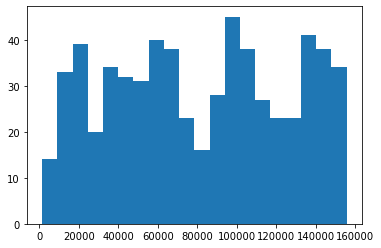

<IPython.core.display.Javascript object>

In [45]:
plot_character_hist(character_occurences, "elizabeth")

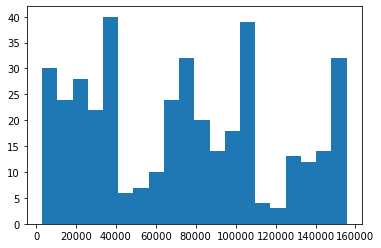

<IPython.core.display.Javascript object>

In [46]:
plot_character_hist(character_occurences, "darcy")

### Cumulative occurrences

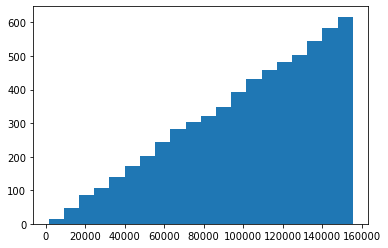

<IPython.core.display.Javascript object>

In [47]:
plot_character_hist(character_occurences, "elizabeth", cumulative=True)

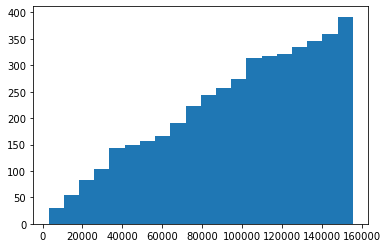

<IPython.core.display.Javascript object>

In [48]:
plot_character_hist(character_occurences, "darcy", cumulative=True)

### Spacy parse tree in action

[Hint](# "ent.subtree, token.pos_ == 'ADJ'") 

In [49]:
# Find words (adjectives) that describe Mr. Darcy.


def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`

    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """

    adjectives = []
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == "ADJ":  # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)

    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == "nsubj":
                for child in ent.root.head.children:
                    if child.dep_ == "acomp":
                        adjectives.append(child.lemma_)

    return adjectives


print(get_character_adjectives(processed_text, "darcy"))

['grave', 'delighted', 'late', 'late', 'late', 'late', 'intimate', 'confidential', 'present', 'infamous', 'steward', 'superior', 'opposite', 'late', 'late', 'few', 'poor', 'last', 'clever', 'worth', 'grow', 'studious', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'kind', 'handsome', 'down', 'proud', 'tall', 'punctual', 'delighted', 'fond']


<IPython.core.display.Javascript object>

In [50]:
# Find words (adjectives) that describe Elizabeth.


def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`

    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """

    adjectives = []
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == "ADJ":  # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)

    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == "nsubj":
                for child in ent.root.head.children:
                    if child.dep_ == "acomp":
                        adjectives.append(child.lemma_)

    return adjectives


print(get_character_adjectives(processed_text, "elizabeth"))

['easy', 'unaffected', 'least', 'dear', 'young', 'dear', 'dear', 'dear', 'first', 'acute', 'dear', 'latter', 'lovely', 'more', 'glad', 'catch', 'surprised', 'surprised', 'deep', 'pleased', 'watchful', 'satisfied', 'prepared', 'equal', 'ready', 'thankful', 'surprised', 'surprised', 'eager', 'shocked', 'disappointed', 'distressed', 'delighted', 'rejoiced', 'sensible', 'prepared', 'pleased', 'relieve', 'pleased', 'pleased', 'surprised', 'sorry', 'surprised', 'disgust', 'glad', 'pleased', 'determined', 'more', 'embarrassed', 'acquainted']


<IPython.core.display.Javascript object>

For all the dependencies manual: https://nlp.stanford.edu/software/dependencies_manual.pdf

`acomp`: adjectival complement
*i.e.* an adjectival phrase which functions as the complement (like an object of the verb) e.g. "She looks very beautiful": *beautiful* is an adjectival complement of *looks*

`nsubj`: nominal subject
*i.e.* a noun phrase which is the syntactic subject of a clause. The head of this relation
might not always be a verb: when the verb is a copular verb, the root of the clause is the complement of
the copular verb, which can be an adjective or noun.
*e.g.* "Clinton defeated Dole". The relationship is *nsubj(defeated, Clinton)*

"The baby is cute". The relationship is *nsubj(cute, baby)*.

In the code, `.dep_`stands for syntactic dependency, *i.e.* the relation between tokens.

In [51]:
processed_text.ents[30].root.dep_

'pobj'

<IPython.core.display.Javascript object>

[Hint](# "ent.label_, ent.root.head.lemma_") 

In [52]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()


for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "say":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "do":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "talk":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 


[('Elizabeth', 46), ('Bennet', 28), ('Jane', 14), ('Darcy', 13), ('Miss Bingley', 9), ('Fitzwilliam', 6), ('Bingley', 5), ('Gardiner', 5), ('Lady Catherine', 4), ('Wickham', 4)]
[('Elizabeth', 48), ('Bennet', 28), ('Darcy', 16), ('Jane', 14), ('Miss Bingley', 10), ('Gardiner', 8), ('Bingley', 7), ('Fitzwilliam', 6), ('Lady Catherine', 5), ('Lizzy', 5)]
[('Elizabeth', 48), ('Bennet', 28), ('Darcy', 16), ('Jane', 15), ('Miss Bingley', 10), ('Gardiner', 9), ('Bingley', 7), ('Lady Catherine', 7), ('Fitzwilliam', 6), ('Lizzy', 5)]


<IPython.core.display.Javascript object>

[Hint](# "ent.label_, ent.root.head.pos_") 

In [53]:
# Find 20 most used verbs
verb_counter = Counter()

for ent in processed_text.ents:
    if ent.label_ == "PERSON" and ent.root.head.pos_ == "VERB":
        verb_counter[ent.root.head.lemma_] += 1

print(verb_counter.most_common(20))

[('say', 159), ('be', 113), ('have', 67), ('see', 54), ('cry', 49), ('reply', 48), ('look', 30), ('make', 24), ('leave', 24), ('come', 23), ('think', 23), ('go', 18), ('begin', 17), ('give', 17), ('do', 16), ('tell', 16), ('take', 16), ('feel', 15), ('know', 15), ('marry', 15)]


<IPython.core.display.Javascript object>

In [54]:
# Create a dataframe with the most used verb and how many time a character used the verb

import pandas as pd
verb_characters = {}
verb_list = [verb[0] for verb in verb_counter.most_common(20)]
for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ in verb_list:
        verb = ent.root.head.lemma_
        person = ent.text
        if verb not in verb_characters:
            verb_characters[verb] = {person:1}
        else:
            if ent.text not in verb_characters[verb]:
                verb_characters[verb][person] = 1
            else:
                verb_characters[verb][person] += 1


<IPython.core.display.Javascript object>

In [55]:
verb_counter.most_common(20)

[('say', 159),
 ('be', 113),
 ('have', 67),
 ('see', 54),
 ('cry', 49),
 ('reply', 48),
 ('look', 30),
 ('make', 24),
 ('leave', 24),
 ('come', 23),
 ('think', 23),
 ('go', 18),
 ('begin', 17),
 ('give', 17),
 ('do', 16),
 ('tell', 16),
 ('take', 16),
 ('feel', 15),
 ('know', 15),
 ('marry', 15)]

<IPython.core.display.Javascript object>

In [58]:
df = pd.DataFrame(verb_characters).transpose().fillna(0)
df

,Bennet,Elizabeth,Charlotte,Darcy,Wickham,Miss Bingley,Jane,Collins,William,Fitzwilliam,...,F.,Hill,Lydia Bennet,Sarah,Miss Bingley\n,Eliza Bennet,Lydia,Bakewell,Brighton,Lucas
reply,3.0,18.0,2.0,7.0,4.0,1.0,7.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
be,33.0,54.0,0.0,42.0,17.0,4.0,27.0,15.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
make,2.0,8.0,0.0,2.0,1.0,1.0,3.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
say,28.0,46.0,3.0,13.0,4.0,9.0,14.0,3.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
see,2.0,16.0,1.0,8.0,4.0,3.0,7.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
have,8.0,18.0,0.0,6.0,6.0,0.0,6.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
do,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
come,0.0,0.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
cry,3.0,24.0,0.0,3.0,1.0,3.0,6.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feel,0.0,12.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [59]:
# drop the less meaningful columns
df = df[df.columns[df.sum() >= 10]].sort_index()
df

,Bennet,Elizabeth,Darcy,Wickham,Miss Bingley,Jane,Collins,William,Fitzwilliam,Gardiner,Bingley,Lizzy,Lady Catherine
be,33.0,54.0,42.0,17.0,4.0,27.0,15.0,5.0,3.0,4.0,17.0,11.0,9.0
begin,1.0,3.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
come,0.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0
cry,3.0,24.0,3.0,1.0,3.0,6.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0
do,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0
feel,0.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
give,3.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0
go,2.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
have,8.0,18.0,6.0,6.0,0.0,6.0,5.0,1.0,0.0,0.0,3.0,5.0,2.0
know,0.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,0.0


<IPython.core.display.Javascript object>

,Bennet,Elizabeth,Darcy,Wickham,Miss Bingley,Jane,Collins,William,Fitzwilliam,Gardiner,Bingley,Lizzy,Lady Catherine
be,33.000000,54.000000,42.000000,17.000000,4.000000,27.000000,15.000000,5.000000,3.000000,4.000000,17.000000,11.000000,9.000000
begin,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
come,0.000000,0.000000,4.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
cry,3.000000,24.000000,3.000000,1.000000,3.000000,6.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000
do,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000
feel,0.000000,12.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
give,3.000000,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.000000
go,2.000000,4.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
have,8.000000,18.000000,6.000000,6.000000,0.000000,6.000000,5.000000,1.000000,0.000000,0.000000,3.000000,5.000000,2.000000
know,0.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000


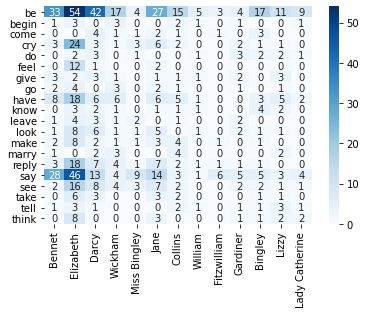

<IPython.core.display.Javascript object>

In [60]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True, cmap='Blues')
df.style.background_gradient(cmap='Blues')
